# Baseline classifier
ReLU activation, 4 layers, 100 neurons per layer
Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelRelu', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 13.120s 


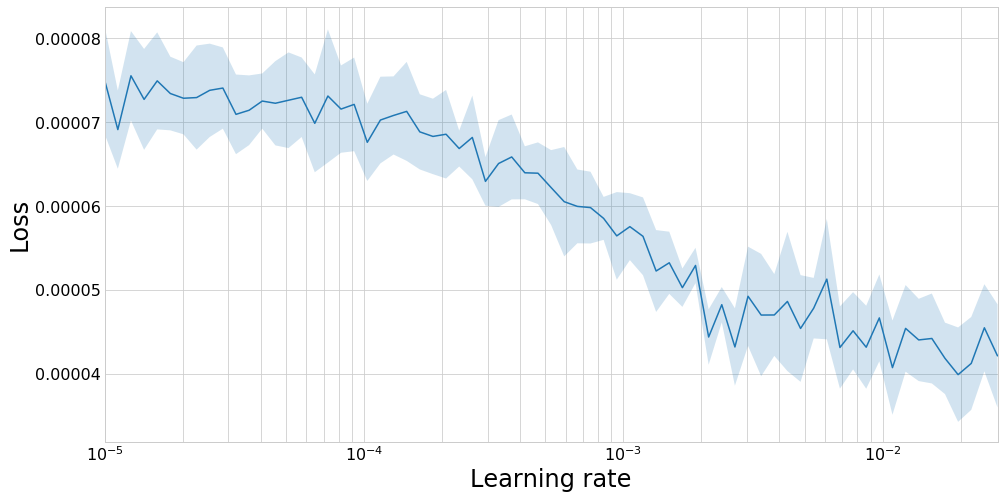

______________________________________



In [5]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.8995490533649895e-05
2 New best found: 3.677650037254348e-05
4 New best found: 3.6342602578125444e-05
5 New best found: 3.569703526022954e-05
6 New best found: 3.555848345830141e-05
8 New best found: 3.484595442151366e-05
9 New best found: 3.4714723447742915e-05
11 New best found: 3.4502876897548304e-05
16 New best found: 3.44644845257839e-05
17 New best found: 3.396356019014108e-05
18 New best found: 3.375305916876857e-05
23 New best found: 3.369351552038975e-05
27 New best found: 3.367481487168402e-05
28 New best found: 3.363448094157585e-05
29 New best found: 3.338440868512309e-05
57 New best found: 3.33534744929757e-05
Early stopping after 107 epochs
Score is: {'loss': 3.33534744929757e-05, 'wAUC': 0.0693338858753555, 'AUC': 0.1122888685477954, 'AMS': 3.4941514226040424, 'cut': 0.9184848070144653}
Fold took 84.422s

Running fold 2 / 10
1 New best found: 4.07974732225879e-05
2 New

41 New best found: 3.336230379136159e-05
50 New best found: 3.3309172818181887e-05
54 New best found: 3.324695068085301e-05
Early stopping after 104 epochs
Score is: {'loss': 3.324695068085301e-05, 'wAUC': 0.06958803553265558, 'AUC': 0.10756561833987832, 'AMS': 3.6503326997692547, 'cut': 0.9317176342010498}
Fold took 92.915s

Running fold 9 / 10
1 New best found: 4.022620481391342e-05
2 New best found: 3.910783248486742e-05
3 New best found: 3.72241429765398e-05
4 New best found: 3.720016895105423e-05
5 New best found: 3.647464384280393e-05
7 New best found: 3.615024284428519e-05
8 New best found: 3.565673261528532e-05
11 New best found: 3.5531435921754906e-05
12 New best found: 3.530253022574803e-05
15 New best found: 3.5061070442981616e-05
17 New best found: 3.493029201537104e-05
18 New best found: 3.459269125515998e-05
19 New best found: 3.458186725298014e-05
22 New best found: 3.4484498363004975e-05
28 New best found: 3.4289962583560586e-05
33 New best found: 3.42648770877887e-05
3

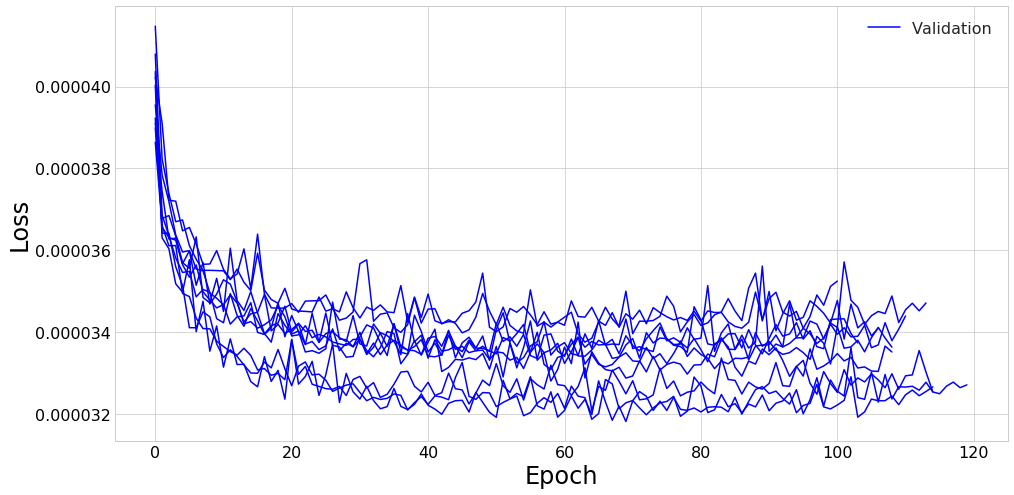

Mean loss = 3.29e-05 +- 2e-07
Mean wAUC = 0.0679 +- 0.0009
Mean AUC = 0.108 +- 0.001
Mean AMS = 3.49 +- 0.03
Mean cut = 0.929 +- 0.004
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':1e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=1, amsSize=250000)

## Construct ensemble

In [7]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [8]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 9 with loss = 3.1811885936735456e-05
Model 1 is 6 with loss = 3.1866747701133134e-05
Model 2 is 3 with loss = 3.20724723074818e-05
Model 3 is 4 with loss = 3.280160887952661e-05
Model 4 is 2 with loss = 3.308373015764843e-05
Model 5 is 1 with loss = 3.323221986982327e-05
Model 6 is 7 with loss = 3.324695068085301e-05
Model 7 is 0 with loss = 3.33534744929757e-05
Model 8 is 8 with loss = 3.375298197370977e-05
Model 9 is 5 with loss = 3.401009979424998e-05


## Response on validation datawith no ensembling

In [6]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [14]:
%%time
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=1, verbose=1)

Predicting batch 1 out of 10
Prediction took 2.3635351200937293e-05s per sample

Predicting batch 2 out of 10
Prediction took 1.5595415400457568e-05s per sample

Predicting batch 3 out of 10
Prediction took 2.120130780094769e-05s per sample

Predicting batch 4 out of 10
Prediction took 2.3937533999560402e-05s per sample

Predicting batch 5 out of 10
Prediction took 3.407710660248995e-05s per sample

Predicting batch 6 out of 10
Prediction took 2.2297741600777952e-05s per sample

Predicting batch 7 out of 10
Prediction took 1.769984640122857e-05s per sample

Predicting batch 8 out of 10
Prediction took 1.9539536998490804e-05s per sample

Predicting batch 9 out of 10
Prediction took 1.6149964602664112e-05s per sample

Predicting batch 10 out of 10
Prediction took 1.676874679978937e-05s per sample

CPU times: user 1.26 s, sys: 67 ms, total: 1.33 s
Wall time: 1.06 s


In [8]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.8902384255024245, weighted 0.9289821264389091


In [15]:
%%time
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded
CPU times: user 10.8 s, sys: 0 ns, total: 10.8 s
Wall time: 10.8 s


(3.4377457958914515, 0.94942504)

In [10]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=3.5+-0.1, at mean cut of 0.94+-0.01
Exact mean cut 0.9417530075879768, corresponds to AMS of 3.391275524822317
CPU times: user 2.51 s, sys: 5.33 s, total: 7.84 s
Wall time: 2min 53s


(3.5, 0.94)

# Test scoring with no ensembling

In [11]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [12]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=1, verbose=1)

Predicting batch 1 out of 10
Prediction took 1.935480261824771e-05s per sample

Predicting batch 2 out of 10
Prediction took 1.840818059995813e-05s per sample

Predicting batch 3 out of 10
Prediction took 1.6763118508970366e-05s per sample

Predicting batch 4 out of 10
Prediction took 1.5932926363629204e-05s per sample

Predicting batch 5 out of 10
Prediction took 1.5865072890830397e-05s per sample

Predicting batch 6 out of 10
Prediction took 1.7854372309044595e-05s per sample

Predicting batch 7 out of 10
Prediction took 1.573599421826657e-05s per sample

Predicting batch 8 out of 10
Prediction took 1.643013381822543e-05s per sample

Predicting batch 9 out of 10
Prediction took 1.751246405474376e-05s per sample

Predicting batch 10 out of 10
Prediction took 1.5795800218157556e-05s per sample

CPU times: user 11.9 s, sys: 612 ms, total: 12.5 s
Wall time: 9.35 s


In [13]:
scoreTestOD(testData.source, 0.9417530075879768)

Public:Private AMS: 3.3981450167574483 : 3.4193501673707583


(3.3981450167574483, 3.4193501673707583)

## Response on validation data with ensembling

In [9]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [16]:
%%time
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.0004930301792017416s per sample

Predicting batch 2 out of 10
Prediction took 0.0001716370628011646s per sample

Predicting batch 3 out of 10
Prediction took 0.00015679717200109736s per sample

Predicting batch 4 out of 10
Prediction took 0.00015881010919983963s per sample

Predicting batch 5 out of 10
Prediction took 0.00016798020060232376s per sample

Predicting batch 6 out of 10
Prediction took 0.00016208769420045428s per sample

Predicting batch 7 out of 10
Prediction took 0.00016028085259895306s per sample

Predicting batch 8 out of 10
Prediction took 0.00024869792519893963s per sample

Predicting batch 9 out of 10
Prediction took 0.0001698805716005154s per sample

Predicting batch 10 out of 10
Prediction took 0.00015150317559891845s per sample

CPU times: user 12.7 s, sys: 481 ms, total: 13.1 s
Wall time: 10.2 s


In [11]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.8971317733420872, weighted 0.9332197922540015


In [12]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.7236501395850556, 0.9505463)

In [13]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=3.8+-0.1, at mean cut of 0.94+-0.02
Exact mean cut 0.9394347775960341, corresponds to AMS of 3.6369804217542
CPU times: user 2.55 s, sys: 5.3 s, total: 7.85 s
Wall time: 2min 46s


(3.8, 0.94)

# Test scoring

In [17]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [18]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00017718964656358532s per sample

Predicting batch 2 out of 10
Prediction took 0.00017974635165453285s per sample

Predicting batch 3 out of 10
Prediction took 0.00020175610129094407s per sample

Predicting batch 4 out of 10
Prediction took 0.00018376427030909162s per sample

Predicting batch 5 out of 10
Prediction took 0.00015410180430910922s per sample

Predicting batch 6 out of 10
Prediction took 0.0001495089997090955s per sample

Predicting batch 7 out of 10
Prediction took 0.00015657268110907436s per sample

Predicting batch 8 out of 10
Prediction took 0.00015802738783637655s per sample

Predicting batch 9 out of 10
Prediction took 0.00016214787027274725s per sample

Predicting batch 10 out of 10
Prediction took 0.00017816751067273965s per sample

CPU times: user 1min 57s, sys: 5.4 s, total: 2min 3s
Wall time: 1min 33s


In [19]:
scoreTestOD(testData.source, 0.9394347775960341)

Public:Private AMS: 3.6194776451673905 : 3.63113989408426


(3.6194776451673905, 3.63113989408426)

# Save/Load

In [4]:
name = "weights/ReLU_Baseline"

In [164]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=True)

In [5]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)